## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas(구조화된 데이터(엑셀)를 빠르고 쉽게 다룰수 있도록 설계되어 고급데이터 구조와 관련된 함수를 제공)
- numpy (산술계산과 통계관련작업을 위한 가장 기본이 되는 필수 라이브러리)
- matplotlib(데이터 시각화 라이브러리,박스플롯,산점도,히스토그램 등)
- seaborn(맷플로립을 토대로 돌아가는 고급 데이터 시각화 라이브러리, 상관관계,선형관계,범주형 데이터를 표현하는 등)
- 위에서 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#한글깨짐 현상 해결(폰트 설정하기)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Users/my/Desktop/data/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf').get_name()
rc('font', family=font_name)

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다.
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.
- 인코딩 관련 에러 대응하기(endcoding='cp949','utf-8','utf8-sig')

#### 1. CSV, Excel 파일을 불러오기 위해서는 pandas 라이브러리를 사용, pandas는 read_csv(),excel() 함수를 제공합니다.
df = pd.read_csv('파일명.csv')
Excel 파일 불러오기
df = pd.read_excel('파일명.xlsx', sheet_name='시트명')


#### 2. DB 데이터를 불러오기 위해서는 sqlite3 모듈을 사용하여 SQLite DB를 다룹니다. pymysql이나 psycopg2 등을 사용하여 다른 DB도 다룰 수 있습니다.

import sqlite3
conn = sqlite3.connect('db명.db') #DB 연결

cur = conn.cursor()
cur.execute('SELECT * FROM 테이블명') #쿼리 실행

rows = cur.fetchall() #결과가져오기

#### 3. JSON 파일을 불러오기 위해서는 json 모듈을 사용합니다.
import json

with open('파일명.json', 'r') as f:

    data = json.load(f)

#### 4. HTML 파일을 불러오기 위해서는 beautifulsoup4 라이브러리를 사용합니다.
from bs4 import BeautifulSoup

with open('파일명.html', 'r') as f:

    soup = BeautifulSoup(f, 'html.parser')
    
####  5. 패키지에 포함된 데이터를 불러오기 위해서는 pkg_resources 모듈을 사용합니다.
import pkg_resources

data = pkg_resources.resource_string('패키지명', '파일명') #패키지 데이터 불러오기

In [3]:
health=pd.read_csv('C:/Users/my/Desktop/data/nhis_nhcp_info_20211229.csv',encoding='cp949')
#UnicodeDecodeError"'utf-8' 코덱이 위치 0의 바이트 0xb1을 디코딩할 수 없습니다: 잘못된 시작 바이트"

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [4]:
health.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
#변수명 바꾸기
health=health.rename(columns={"기준년도":'year',"가입자 일련번호":'id',"시도코드":'sido',"성별코드":'sex',"연령대 코드(5세단위)":'age_group',"신장(5Cm단위)":'height',"체중(5Kg 단위)":'weight',"허리둘레":'waist',"시력(좌)":'sight_l',"시력(우)":'sight_r',"청력(좌)":'hear_l', "청력(우)":'hear_r',
                              "수축기 혈압":'bp_high' ,"이완기 혈압":'bp_lwst' ,"식전혈당(공복혈당)":'blds' ,
                              "총 콜레스테롤":'tot_chole' ,"트리글리세라이드":'trigliserida' ,"HDL 콜레스테롤":'hdl',"LDL 콜레스테롤":'ldl' ,
                              "혈색소":'hmg',"요단백":'orig_prote_cd',"혈청크레아티닌":'creatine',"(혈청지오티)AST":'sqot_ast',"(혈청지오티)ALT":'srpt_alt',"감마 지티피":'g_gpt',"흡연상태":'smk',"음주여부":'drk',"구강검진 수검여부":'hichk_oe_inspec_yn',"치아우식증유무":'crs_yn',"치석":'ttr_yn',"데이터 공개일자":'date_std_dt'}) 

In [6]:
print("데이터 모형 \t")
print(health.shape)

print("\n컬럼별 타입,null값 존재여부")
print(health.info())

데이터 모형 	
(1000000, 31)

컬럼별 타입,null값 존재여부
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1000000 non-null  int64  
 1   id                  1000000 non-null  int64  
 2   sido                1000000 non-null  int64  
 3   sex                 1000000 non-null  int64  
 4   age_group           1000000 non-null  int64  
 5   height              1000000 non-null  int64  
 6   weight              1000000 non-null  int64  
 7   waist               999892 non-null   float64
 8   sight_l             999743 non-null   float64
 9   sight_r             999748 non-null   float64
 10  hear_l              999778 non-null   float64
 11  hear_r              999770 non-null   float64
 12  bp_high             992468 non-null   float64
 13  bp_lwst             992466 non-null   float64
 14  blds                99239

# 데이터 형변환 방법
-- (신장변수와 체중변수를 형변환?굳이 필요는 없는것 같아서 그대로 진행)
- int() 함수는 문자열이나 실수를 정수형으로 변환
- float() 함수는 문자열이나 정수를 실수형으로 변환
- str() 함수는 다른 자료형을 문자열로 변환
- astype() 메서드 사용: 판다스(Pandas) 라이브러리의 데이터프레임(DataFrame)이나 시리즈(Series) 객체에서는 astype() 메서드를 사용하여 데이터 형변환 가능
- to_numeric() 함수 사용: 판다스(Pandas) 라이브러리의 to_numeric() 함수는 문자열로 저장된 숫자를 숫자형으로 변환


In [7]:
print("\성별 변수 타입")
print(health['sex'].dtypes)

print("\n거주 지역 목록")
print(list(set(health['sido'])))

print("\n수진자 연령대")
print(list(set(health['age_group'])))


\성별 변수 타입
int64

거주 지역 목록
[36, 41, 42, 11, 44, 43, 46, 47, 48, 45, 49, 26, 27, 28, 29, 30, 31]

수진자 연령대
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [8]:
from scipy.stats import skew, kurtosis
health.iloc[:,5:-1].apply(['skew', 'kurtosis']).T


,skew,kurtosis
height,0.008631,-0.480053
weight,0.576457,0.539166
waist,1.298341,97.340630
sight_l,10.340709,143.031221
sight_r,10.343656,141.415812
hear_l,4.799266,23.621670
hear_r,4.925663,24.925418
bp_high,0.455880,0.925235
bp_lwst,0.320706,0.695336
blds,4.188519,35.493802


- 왜도는 수치가 좌우로 치우쳐진 정도를 나타냄
왜도가 양수 - 분포가 왼쪽으로 치우치고 오른쪽으로 긴 꼬리 분포(중앙값>평균),
왜도가 음수 - 분포가 오른쪽으로 치우치고 왼쪽으로 긴 꼬리 분포(중앙값<평균)

- 첨도는 분포가 정규분포보다 얼마나 뾰족하거나(데이터가 몰려있음) 완만한지(데이터가 두루 퍼져있음)의 정도를 나타내는 척도
첨도가 기준보다 크면 양의 첨도(급첨), 작으면 음의첨도(완첨)

- 왜도가 0 첨도가 1일 경우 완전한 정규분포라고 봅니다.


In [9]:
from scipy.stats import mode, skew, kurtosis
#최빈값
health.iloc[:,5:-1].apply(mode)

,height,weight,waist,sight_l,sight_r,hear_l,hear_r,bp_high,bp_lwst,blds,...,orig_prote_cd,creatine,sqot_ast,srpt_alt,g_gpt,smk,drk,hichk_oe_inspec_yn,crs_yn,ttr_yn
0,[160],[60],[80.0],[1.0],[1.0],[1.0],[1.0],[130.0],[80.0],[96.0],...,[1.0],[0.8],[22.0],[16.0],[15.0],[1.0],[1.0],[0],[nan],[nan]
1,[184993],[158678],[38198],[202138],[206683],[955154],[957287],[63669],[103661],[33258],...,[914825],[192871],[61223],[46889],[39958],[626138],[584685],[668616],[668617],[668618]


In [10]:
print("성별 고유값의 개수")
print(health['sex'].value_counts())
print("\n시도코드 고유값의 개수")
print(health['sido'].value_counts())
print("\n연령대 코드 고유값의 개수")
print(health['age_group'].value_counts().sort_index(ascending=False))

성별 고유값의 개수
1    510689
2    489311
Name: sex, dtype: int64

시도코드 고유값의 개수
41    247369
11    166231
26     69025
48     68530
28     58345
47     54438
27     48413
44     42582
45     38066
46     38041
43     34009
42     32023
30     30057
29     28532
31     26001
49     11878
36      6460
Name: sido, dtype: int64

연령대 코드 고유값의 개수
18      6237
17     23401
16     36663
15     73714
14     86653
13    155096
12    142089
11    175705
10    144165
9     156277
Name: age_group, dtype: int64


In [11]:
health.iloc[:,4:-1].corr()

,age_group,height,weight,waist,sight_l,sight_r,hear_l,hear_r,bp_high,bp_lwst,...,orig_prote_cd,creatine,sqot_ast,srpt_alt,g_gpt,smk,drk,hichk_oe_inspec_yn,crs_yn,ttr_yn
age_group,1.000000,-0.365121,-0.235258,0.098477,-0.155089,-0.147627,0.223054,0.218556,0.229686,-0.030582,...,0.024181,0.046580,0.030282,-0.060127,-0.057309,-0.162729,-0.335340,-0.115081,-0.068458,-0.085002
height,-0.365121,1.000000,0.661926,0.327558,0.113394,0.113258,-0.077046,-0.078484,0.004569,0.133519,...,0.024544,0.224141,0.027489,0.131465,0.165648,0.476120,0.355115,0.082205,0.035662,0.044720
weight,-0.235258,0.661926,1.000000,0.784041,0.075184,0.074312,-0.050075,-0.051380,0.191802,0.257129,...,0.049407,0.192722,0.073845,0.237981,0.194396,0.355304,0.252780,0.061033,0.038551,0.051578
waist,0.098477,0.327558,0.784041,1.000000,0.006084,0.007180,0.035000,0.032190,0.275676,0.242307,...,0.066239,0.163416,0.091252,0.222426,0.191817,0.242004,0.099154,0.024158,0.023517,0.044684
sight_l,-0.155089,0.113394,0.075184,0.006084,1.000000,0.281132,-0.035169,-0.034290,-0.031905,0.015523,...,-0.005537,0.014417,-0.003730,0.017242,0.016803,0.056288,0.069715,0.006555,0.009887,0.011949
sight_r,-0.147627,0.113258,0.074312,0.007180,0.281132,1.000000,-0.030699,-0.028233,-0.030420,0.014267,...,-0.005484,0.018797,-0.003068,0.016227,0.018325,0.055614,0.066594,0.002138,0.013118,0.011218
hear_l,0.223054,-0.077046,-0.050075,0.035000,-0.035169,-0.030699,1.000000,0.545578,0.050966,-0.015231,...,0.020640,0.029047,0.006622,-0.014044,-0.003024,-0.022051,-0.074636,0.017226,-0.005814,-0.031353
hear_r,0.218556,-0.078484,-0.051380,0.032190,-0.034290,-0.028233,0.545578,1.000000,0.049384,-0.015562,...,0.019267,0.025381,0.006663,-0.014346,-0.003797,-0.024190,-0.075418,0.019137,-0.004947,-0.031952
bp_high,0.229686,0.004569,0.191802,0.275676,-0.031905,-0.030420,0.050966,0.049384,1.000000,0.700120,...,0.061521,0.057696,0.049696,0.073266,0.111280,0.037068,-0.019150,-0.063256,0.018284,0.016441
bp_lwst,-0.030582,0.133519,0.257129,0.242307,0.015523,0.014267,-0.015231,-0.015562,0.700120,1.000000,...,0.043905,0.050919,0.052773,0.103708,0.140967,0.110998,0.095305,-0.017130,0.032381,0.038925


# 목적 1
### 성별,나이,비만도,트리글리세라이드,총콜레스테롤,LDL,HDL - 고지혈증여부

In [12]:
df=health[['sex','age_group','height','weight','tot_chole','hdl','ldl','trigliserida']]
print(df)

        sex  age_group  height  weight  tot_chole   hdl    ldl  trigliserida
0         1          9     165      60      188.0  58.0  118.0          58.0
1         2         13     150      65        NaN   NaN    NaN           NaN
2         2         12     155      55        NaN   NaN    NaN           NaN
3         1         13     160      70        NaN   NaN    NaN           NaN
4         2         12     155      50      220.0  53.0  133.0         171.0
...     ...        ...     ...     ...        ...   ...    ...           ...
999995    2         13     145      55      178.0  43.0   75.0         301.0
999996    2         12     160      55      288.0  71.0  198.0          93.0
999997    1          9     175      70        NaN   NaN    NaN           NaN
999998    2          9     160      70      208.0  59.0  126.0         113.0
999999    1         11     160      55      237.0  68.0  156.0          63.0

[1000000 rows x 8 columns]


In [13]:
df.isnull().sum()

sex                  0
age_group            0
height               0
weight               0
tot_chole       597694
hdl             597685
ldl             605529
trigliserida    597678
dtype: int64

### 파생변수생성(BMI 기준,콜레스테롤 기준 수치,고지혈증여부)

In [14]:
# 파생 변수 추가
df['bmi']= round(df['weight'] / (df['height']/100)** 2,1)
df['bmi_standard'] = df['bmi'].apply(lambda x: 0 if x <= 18.5 else ( 1 if x <= 22.9 else (2 if x <= 24.9 else 3 )))
#BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만으로 판정.


# 결과 출력
print(df)

        sex  age_group  height  weight  tot_chole   hdl    ldl  trigliserida  \
0         1          9     165      60      188.0  58.0  118.0          58.0   
1         2         13     150      65        NaN   NaN    NaN           NaN   
2         2         12     155      55        NaN   NaN    NaN           NaN   
3         1         13     160      70        NaN   NaN    NaN           NaN   
4         2         12     155      50      220.0  53.0  133.0         171.0   
...     ...        ...     ...     ...        ...   ...    ...           ...   
999995    2         13     145      55      178.0  43.0   75.0         301.0   
999996    2         12     160      55      288.0  71.0  198.0          93.0   
999997    1          9     175      70        NaN   NaN    NaN           NaN   
999998    2          9     160      70      208.0  59.0  126.0         113.0   
999999    1         11     160      55      237.0  68.0  156.0          63.0   

         bmi  bmi_standard  
0       22

In [15]:
df.loc[(df['tot_chole'] >= 240) & (df['ldl']>= 160) & (df['hdl'] <= 40), 'hyperlipidemia'] = 1 #고지혈증 있음
df.loc[(df['tot_chole'] < 240) | (df['ldl'] < 160) | (df['hdl'] > 40), 'hyperlipidemia'] = 0 #없음

print(df['hyperlipidemia'].value_counts())
print(df['bmi_standard'].value_counts())

0.0    399224
1.0      2118
Name: hyperlipidemia, dtype: int64
3    403403
1    365553
2    195356
0     35688
Name: bmi_standard, dtype: int64


In [16]:
df.groupby(['sex', 'age_group'])['tot_chole'].count()

sex  age_group
1    9            45738
     10           23869
     11           23396
     12           21931
     13           41440
     14           15215
     15           11160
     16            7253
     17            6471
     18             639
2    9            39500
     10           22837
     11           24652
     12           23750
     13           47654
     14           17204
     15           12436
     16            8302
     17            7695
     18            1164
Name: tot_chole, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sex             1000000 non-null  int64  
 1   age_group       1000000 non-null  int64  
 2   height          1000000 non-null  int64  
 3   weight          1000000 non-null  int64  
 4   tot_chole       402306 non-null   float64
 5   hdl             402315 non-null   float64
 6   ldl             394471 non-null   float64
 7   trigliserida    402322 non-null   float64
 8   bmi             1000000 non-null  float64
 9   bmi_standard    1000000 non-null  int64  
 10  hyperlipidemia  401342 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 83.9 MB


### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

In [18]:
sns.set(rc={'figure.figsize':(10,10)})

<Axes: xlabel='tot_chole', ylabel='Count'>

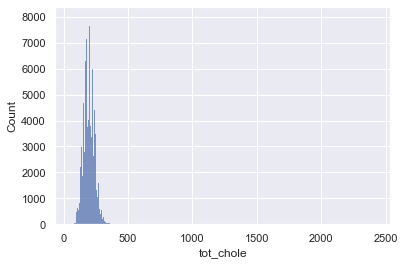

In [19]:
sns.histplot(df['tot_chole'])

<Axes: xlabel='hdl', ylabel='Count'>

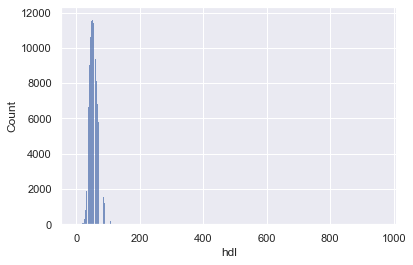

In [20]:
sns.histplot(df['hdl'])

<Axes: xlabel='ldl', ylabel='Count'>

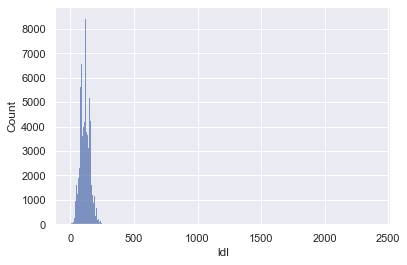

In [21]:
sns.histplot(df['ldl'])

<Axes: xlabel='trigliserida', ylabel='Count'>

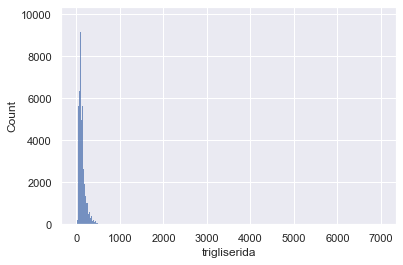

In [22]:
sns.histplot(df['trigliserida'])

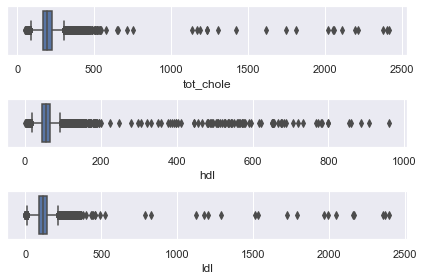

In [23]:
plt.subplot(3, 1, 1)
sns.boxplot(x='tot_chole', data=df)

plt.subplot(3, 1, 2)               
sns.boxplot(x='hdl', data=df)

plt.subplot(3, 1, 3)                
sns.boxplot(x='ldl', data=df)

plt.tight_layout()
plt.show()

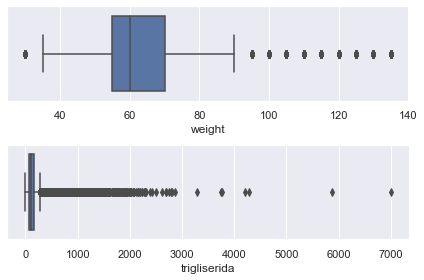

In [24]:
plt.subplot(2, 1, 1)  
sns.boxplot(x='weight', data=df)

plt.subplot(2, 1, 2) 
sns.boxplot(x='trigliserida', data=df)

plt.tight_layout()
plt.show()

- 총콜레스테롤, HDL,LDL,몸무게,트리글리세라이드 변수에 이상치가 많이 포함되어 있다.
이상값을 처리해야할것같다.


In [25]:
print(df.groupby('sex')['tot_chole','trigliserida'].describe())
print(df.groupby('sex')['ldl','hdl'].describe())

    tot_chole                                                            \
        count        mean        std   min    25%    50%    75%     max   
sex                                                                       
1    197112.0  195.263358  43.506887  54.0  166.0  194.0  222.0  2193.0   
2    205194.0  201.526282  42.699673  54.0  173.0  199.0  227.0  2416.0   

    trigliserida                                                           
           count        mean         std  min   25%    50%    75%     max  
sex                                                                        
1       197121.0  153.594076  118.249689  4.0  86.0  125.0  184.0  5869.0  
2       205201.0  114.858434   73.693627  2.0  70.0   97.0  139.0  6999.0  
          ldl                                                          \
        count        mean        std  min   25%    50%    75%     max   
sex                                                                     
1    190862.0  113.835729

'''총 콜레스테롤 , 트리글리세라이드,LDL 콜레스테롤 1000을 넘어가는 수치가 많음
HDL 콜레스테롤 최댓값 960 현실실적이지 않은 수치가 존재'''

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

<Axes: xlabel='sex', ylabel='trigliserida'>

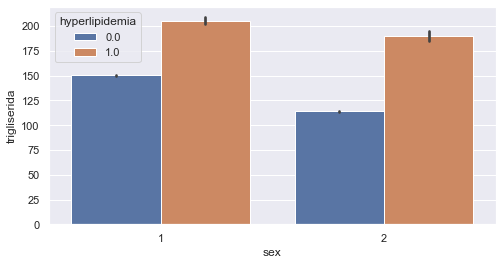

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='sex', y='trigliserida', hue='hyperlipidemia')

- 성별이 남성인 사람이 중성지방이 많고,고지혈증이 있는 사람이 많다.

<Axes: xlabel='age_group', ylabel='trigliserida'>

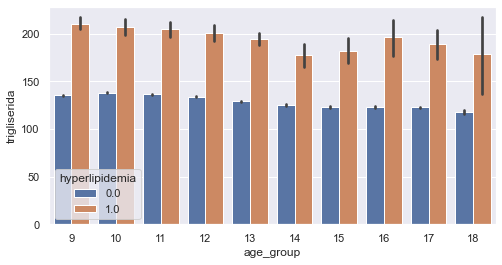

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='age_group', y='trigliserida', hue='hyperlipidemia')

고지혈증 여부와 연령대,bmi는 관련이 있지 않을까?
two sample Chi-squared test를 사용하면 "고지혈증여부와 연령대는 독립이다."라는 가설을 검정할 수 있다. 
Chi-squared test는 categorical data에만 사용할 수 있다는 점

In [28]:
from scipy.stats import chi2_contingency

# 연령대와 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(df['age_group'], df['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)


chi2-statistic:  86.85848343851364
p-value:  6.935858815031033e-15


'''카이제곱 검정 결과, chi2-statistic 값이 86.86이고 p-value 값이 6.94e-15로 나왔습니다.
p-value 값은 유의수준(alpha)과 비교하여 작을수록 귀무가설을 기각할 수 있는 강력한 증거가 된다는 것을 의미
여기서 p-value가 매우 작으므로 귀무가설을 기각. 따라서, 연령대와 고지혈증여부 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, 연령대와 고지혈증여부에는 유의한 관계가 있으며, 이 관계를 더 자세히 알아보기 위해서는 추가적인 분석이 필요합니다.'''

In [29]:
# bmi지수기준과 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(df['bmi_standard'], df['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)

chi2-statistic:  432.087043620864
p-value:  2.4786656762555877e-93



'''카이제곱 검정 결과, 통계량 chi2-statistic 값이 407,.36이고, p-value 값이 5.63e-86으로 매우 작게 나왔습니다.
p-value가 매우 작으므로 귀무가설을 기각. 따라서, bmi지수와 고지혈증여부는 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, bmi지수기준과 고지혈증여부 간에는 유의한 관계가 있다.
'''

In [30]:
#성별과 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(df['sex'], df['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)

chi2-statistic:  389.15860994196856
p-value:  1.2619710582723307e-86


'''카이제곱 검정 결과, 통계량 chi2-statistic 값이 389.16이고, p-value 값이 1.26e-86으로 매우 작게 나왔습니다.
p-value가 매우 작으므로 귀무가설을 기각. 따라서, 성별과 고지혈증여부는 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, 성별과 고지혈증여부 간에는 유의한 관계가 있다.

<Axes: xlabel='hdl', ylabel='ldl'>

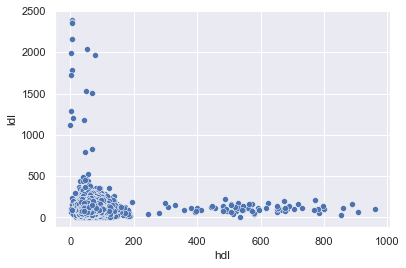

In [31]:
#산점도를 통해 두 변수 간의 관계가 선형인지 비선형인지 확인하여 방향성과 강도를 파악
sns.scatterplot(x='hdl', y='ldl', data=df)

- hdl이 0-200사이와 ldl이0-500사이에 많이 몰려있다.

<Axes: xlabel='bmi', ylabel='trigliserida'>

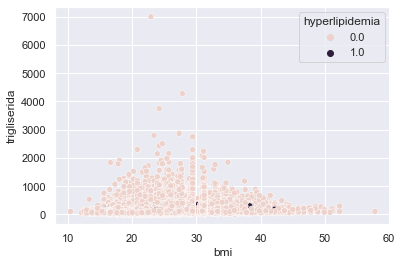

In [32]:
sns.scatterplot(data=df, x='bmi', y='trigliserida', hue='hyperlipidemia')

- 고지혈증여부인 사람의 bmi지수가 30,40에 존재하고 트리글리세이드도 높게 나타난다.

In [33]:
df.corr()

,sex,age_group,height,weight,tot_chole,hdl,ldl,trigliserida,bmi,bmi_standard,hyperlipidemia
sex,1.000000,0.065388,-0.720695,-0.553887,0.072455,0.269239,0.049118,-0.193679,-0.169320,-0.180126,-0.031173
age_group,0.065388,1.000000,-0.365121,-0.235258,-0.179331,-0.077344,-0.148437,-0.058088,-0.020205,0.013490,-0.012586
height,-0.720695,-0.365121,1.000000,0.661926,-0.000263,-0.170868,0.010629,0.148775,0.091322,0.077552,0.023530
weight,-0.553887,-0.235258,0.661926,1.000000,-0.000432,-0.294161,0.006121,0.266429,0.801458,0.691098,0.041568
tot_chole,0.072455,-0.179331,-0.000263,-0.000432,1.000000,0.209850,0.926845,0.220268,-0.004283,-0.004327,0.124985
hdl,0.269239,-0.077344,-0.170868,-0.294161,0.209850,1.000000,0.032473,-0.303949,-0.254358,-0.247114,-0.087766
ldl,0.049118,-0.148437,0.010629,0.006121,0.926845,0.032473,1.000000,0.006281,-0.002846,-0.000399,0.147765
trigliserida,-0.193679,-0.058088,0.148775,0.266429,0.220268,-0.303949,0.006281,1.000000,0.230439,0.217683,0.054812
bmi,-0.169320,-0.020205,0.091322,0.801458,-0.004283,-0.254358,-0.002846,0.230439,1.000000,0.863586,0.035276
bmi_standard,-0.180126,0.013490,0.077552,0.691098,-0.004327,-0.247114,-0.000399,0.217683,0.863586,1.000000,0.032567


- 총 콜레스테롤,LDL콜레스테롤,트리글세라이드,bmi지수와 고지혈증여부사이에 약한 양의 선형 관계가 있음
- HDL콜레스테롤과 고지혈증여부 사이에 약한 음의 선형 관계가 있음

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

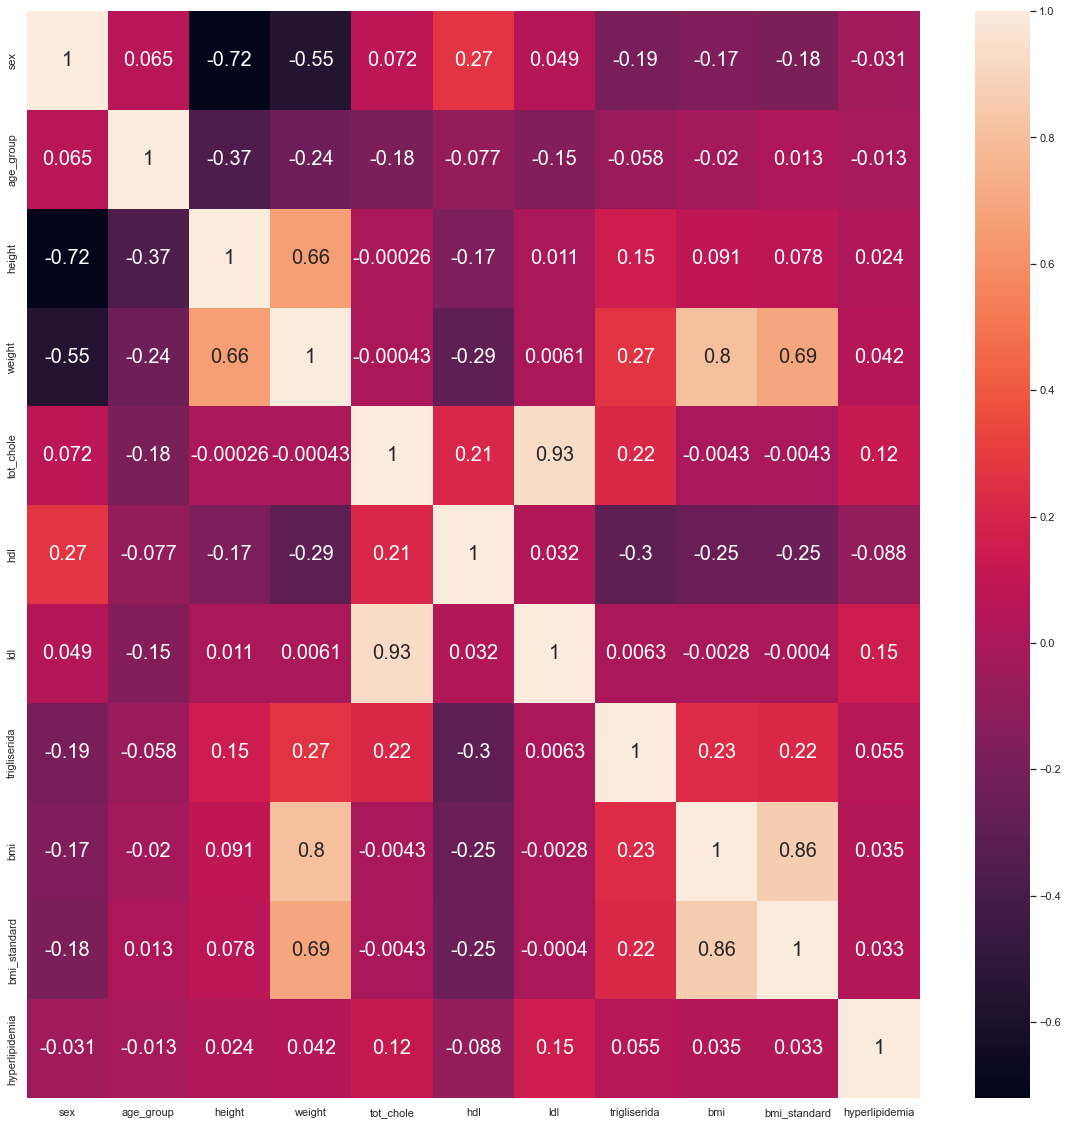

In [34]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True,annot_kws={"size": 20})
plt.show()

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

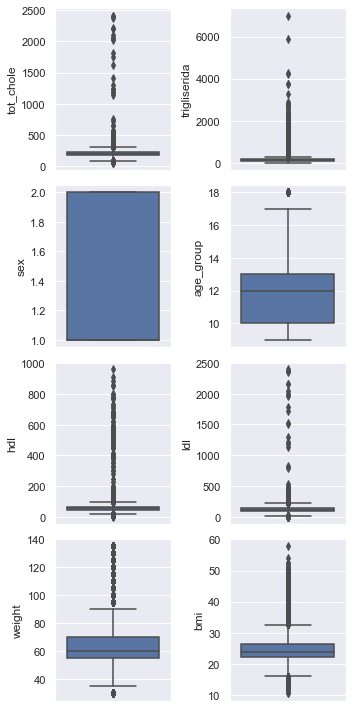

In [35]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = df['tot_chole'], ax = axes[0][0])
sns.boxplot(y = df['trigliserida'], ax = axes[0][1])

sns.boxplot(y = df['sex'], ax = axes[1][0])
sns.boxplot(y = df['age_group'], ax = axes[1][1])

sns.boxplot(y = df['hdl'], ax = axes[2][0])
sns.boxplot(y = df['ldl'], ax = axes[2][1])

sns.boxplot(y = df['weight'], ax = axes[3][0])
sns.boxplot(y = df['bmi'], ax = axes[3][1])

plt.tight_layout()
plt.show()


### 09. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

In [36]:
from sklearn.preprocessing import StandardScaler

sdscaler=StandardScaler()
sdscaler.fit(df)
sd_df=sdscaler.transform(df)
sd_df
print(sd_df.shape)

(1000000, 11)


In [37]:
#결측값을 결측값의 뒷 행의 값으로 채우기 
df=df.fillna(method='bfill')

In [38]:
df.isnull().sum()

sex               0
age_group         0
height            0
weight            0
tot_chole         0
hdl               0
ldl               0
trigliserida      0
bmi               0
bmi_standard      0
hyperlipidemia    0
dtype: int64

In [39]:
def outlier_iqr(data, col):
    #lower(하한),upper(상한) 글로벌 변수 선언하기
    global lower,upper
    #4분위수 기준 지정하기
    q1, q3 =np.quantile(data[col],0.25),np.quantile(data[col],0.75)
    #IQR 계산하기
    iqr = q3 - q1
    #lower,upper 구분값 구하기
    lower,upper= q1 - (1.5 * iqr),q3 + (1.5 * iqr)
    print('IQR은' , round(iqr,3),'이다.')
    print('lower 기준값은' , round(lower,3),'이다.')
    print('upper 기준값은' , round(upper,3),'이다.')
    
    #1사분위수와 4사분위에 속해 있는 데이터 각각 저장하기 
    data1 = data[data[col] > upper]
    data2 = data[data[col] < lower]
    #이상값 총 개수 구하기
    return print('총 이상값 개수는',data1.shape[0]+data2.shape[0],'이다.')

#주의할점 : 이상값 함수를 적용시키기 위해서는 결측값에 적합한 처리 한 후 함수를 적용해야한다

In [40]:
print("총콜레스테롤 이상값")
print(outlier_iqr(df,'tot_chole'))

print("\nHDL콜레스테롤 이상값")
print(outlier_iqr(df,'hdl'))

print("\nLDL콜레스테롤 이상값")
print(outlier_iqr(df,'ldl'))

print("\n트리글리세라이드 이상값")
print(outlier_iqr(df,'trigliserida'))

총콜레스테롤 이상값
IQR은 55.0 이다.
lower 기준값은 87.5 이다.
upper 기준값은 307.5 이다.
총 이상값 개수는 9578 이다.
None

HDL콜레스테롤 이상값
IQR은 19.0 이다.
lower 기준값은 17.5 이다.
upper 기준값은 93.5 이다.
총 이상값 개수는 18122 이다.
None

LDL콜레스테롤 이상값
IQR은 51.0 이다.
lower 기준값은 12.5 이다.
upper 기준값은 216.5 이다.
총 이상값 개수는 7882 이다.
None

트리글리세라이드 이상값
IQR은 83.0 이다.
lower 기준값은 -47.5 이다.
upper 기준값은 284.5 이다.
총 이상값 개수는 55141 이다.
None


In [41]:
df["tot_chole"] = np.where((df["tot_chole"] < lower) | (df["tot_chole"] > upper), df["tot_chole"].median(), df["tot_chole"])
df["hdl"] = np.where((df["hdl"] < lower) | (df["hdl"] > upper), df["hdl"].median(), df["hdl"])
df["ldl"] = np.where((df["ldl"] < lower) | (df["ldl"] > upper), df["ldl"].median(), df["ldl"])
df["trigliserida"] = np.where((df["trigliserida"] < lower) | (df["trigliserida"] > upper), df["trigliserida"].median(), df["trigliserida"])

df.describe()

,sex,age_group,height,weight,tot_chole,hdl,ldl,trigliserida,bmi,bmi_standard,hyperlipidemia
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489311,11.917757,160.964085,63.060790,195.613204,56.674339,115.646979,116.720778,24.220048,1.966474,0.005413
std,0.499886,2.171036,9.197899,12.269907,37.687817,14.713056,37.367428,53.681943,3.543566,0.954246,0.073374
min,1.000000,9.000000,130.000000,30.000000,54.000000,1.000000,1.000000,2.000000,10.400000,0.000000,0.000000
25%,1.000000,10.000000,155.000000,55.000000,170.000000,46.000000,89.000000,77.000000,22.000000,1.000000,0.000000
50%,1.000000,12.000000,160.000000,60.000000,197.000000,55.000000,114.000000,110.000000,23.900000,2.000000,0.000000
75%,2.000000,13.000000,170.000000,70.000000,222.000000,65.000000,140.000000,146.000000,26.200000,3.000000,0.000000
max,2.000000,18.000000,195.000000,135.000000,284.000000,280.000000,284.000000,284.000000,57.800000,3.000000,1.000000


In [42]:
#종속변수가 범주형일 때 -> 로지스틱 회귀 분석 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

X = df[['sex','age_group','bmi','tot_chole','hdl','ldl','trigliserida']]
y = df['hyperlipidemia']
# train data와 test data로 구분 (7:3 비율)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)

# X_train 훈련시키기
lr.fit(X_train,y_train)

# 결정계수(R제곱) 조회하기 
r_square = lr.score(X_test, y_test)

# 기울기
print("회귀식의 기울기 (a)", lr.coef_)

# y 절편
print("회귀식의 y절편 (b)", lr.intercept_)
print(r_square)

훈련 데이터:  (700000, 7)
검증 데이터: (300000, 7)
회귀식의 기울기 (a) [[-0.88376448 -0.14509105 -0.08618851  0.03676275 -0.37215035  0.06320432
   0.0079946 ]]
회귀식의 y절편 (b) [-3.75043826]
0.9954833333333334


##### 회귀식
hyperlipidemia = - 0.88376448  * 'sex' -0.14509105 * 'age_group' 0.08618851 * 'bmi' +0.036762754 * 'tot_chole' -0.37215035 * 'hdl' + 0.06320432 * 'ldl' + 0.0079946 * 'trigliserida' -3.75043826
 
- 총콜레스테롤 수치,LDL콜레스테롤 수치,체질량지수가 높을수록 고지혈증 발생 확률이 높아진다는 것을 의미
- 여성보다 남성일 경우,연령이 증가할수록,HDL콜레스테롤 수치가 높을수록 고지혈증 발생 확률이 낮아진다는 것을 의미

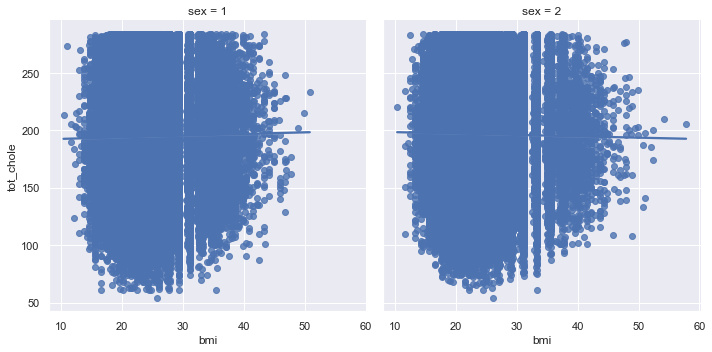

In [43]:
sns.lmplot(data=df, x="bmi", y="tot_chole", col="sex")

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values ("VIF Factor"). reset_index(drop=True)
vif

,VIF Factor,features
0,7.616691,trigliserida
1,9.503447,sex
2,22.400653,hdl
3,23.819073,age_group
4,29.418863,bmi
5,41.002606,ldl
6,117.719117,tot_chole


- VIF 값(분산팽창지수) 이 10이상(엄격히는 5이상)인 경우, 다중공선성 있다고 판단

- 다중공선성을 가지는 독립변수를 하나씩 제거 -> 상관분석에서 상관계수가 0.9 이상인 두 개의 변수를 찾아 먼저 제거해보는 것이 좋습니다. 독립변수를 하나씩 제거하는 과정에서 설명력이 어떻게 변화는지를 체크한 후, 설명력이 유지되거나, 높아지는 변수를 제거합니다.

- PCA를 통해 주성분으로 차원을 감소시켜 다중공선성 문제를 해결 

In [45]:
#주성분분석
# PCA를 위한 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 독립 변수들을 표준화
x = df[['sex','age_group','bmi','tot_chole','hdl','ldl','trigliserida']]
x = StandardScaler().fit_transform(x)

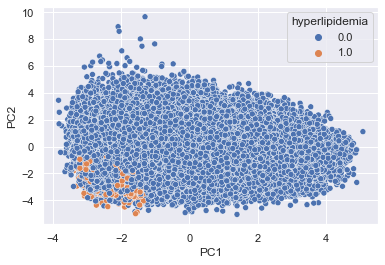

In [46]:
# PCA 모델 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# 주성분으로 이루어진 데이터프레임 생성
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# 데이터프레임 합치기
final_df = pd.concat([principal_df, df[['hyperlipidemia']]], axis = 1)

# 산점도 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='hyperlipidemia', data=final_df)
plt.show()

# 목적2
### 성별, 연령,단백뇨에 따라 혈색소

## 03. 데이터 탐색하기 Explore Data

In [47]:
he=health[['sex','age_group','orig_prote_cd','smk','drk','hmg']]
print(he)

        sex  age_group  orig_prote_cd  smk  drk   hmg
0         1          9            1.0  1.0  0.0  15.0
1         2         13            1.0  1.0  0.0  12.7
2         2         12            1.0  1.0  0.0  12.8
3         1         13            1.0  1.0  0.0  16.4
4         2         12            1.0  1.0  0.0  12.4
...     ...        ...            ...  ...  ...   ...
999995    2         13            1.0  1.0  0.0  13.6
999996    2         12            1.0  1.0  1.0  14.0
999997    1          9            1.0  1.0  1.0  16.0
999998    2          9            1.0  1.0  0.0  11.9
999999    1         11            1.0  2.0  0.0  14.9

[1000000 rows x 6 columns]


In [48]:
he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   sex            1000000 non-null  int64  
 1   age_group      1000000 non-null  int64  
 2   orig_prote_cd  987859 non-null   float64
 3   smk            999657 non-null   float64
 4   drk            999804 non-null   float64
 5   hmg            992389 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 45.8 MB


In [49]:
he.isnull().sum()

sex                  0
age_group            0
orig_prote_cd    12141
smk                343
drk                196
hmg               7611
dtype: int64

## 04. 기술통계량 계산하기 Descriptive Statistics

In [50]:
he.describe()

,sex,age_group,orig_prote_cd,smk,drk,hmg
count,1000000.000000,1000000.000000,987859.000000,999657.000000,999804.000000,992389.00000
mean,1.489311,11.917757,1.122333,1.557421,0.584800,14.20946
std,0.499886,2.171036,0.493386,0.783742,0.492757,1.55418
min,1.000000,9.000000,1.000000,1.000000,0.000000,1.00000
25%,1.000000,10.000000,1.000000,1.000000,0.000000,13.20000
50%,1.000000,12.000000,1.000000,1.000000,1.000000,14.20000
75%,2.000000,13.000000,1.000000,2.000000,1.000000,15.30000
max,2.000000,18.000000,6.000000,3.000000,1.000000,25.00000


In [51]:
he['orig_prote_cd'].describe() 

count    987859.000000
mean          1.122333
std           0.493386
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: orig_prote_cd, dtype: float64

In [52]:
# 성별에 따른 혈색소 수치 평균
sex_mean=he.groupby('sex')['hmg'].mean()
# 흡연여부에 따른 혈색소 수치 평균
smk_mean=he.groupby('smk')['hmg'].mean()
# 음주여부에 따른 혈색소 수치 평균
drk_mean=he.groupby('drk')['hmg'].mean()

print("성별에 따른 혈색소 수치 평균", sex_mean)
print("\n흡연여부에 따른 혈색소 수치 평균", smk_mean)
print("\n음주여부에 따른 혈색소 수치 평균", drk_mean)

성별에 따른 혈색소 수치 평균 sex
1    15.147514
2    13.225899
Name: hmg, dtype: float64

흡연여부에 따른 혈색소 수치 평균 smk
1.0    13.674270
2.0    14.969191
3.0    15.241162
Name: hmg, dtype: float64

음주여부에 따른 혈색소 수치 평균 drk
0.0    13.728235
1.0    14.547130
Name: hmg, dtype: float64


- 남성의 경우 13-16.6g/dL, 여성은 12-15.5g/dL가 정상이다.

## 05. 단변량 분석 Univariate Analysis

In [53]:
#일원분산분석
import pandas as pd

# 데이터 불러오기
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 분산분석 모델 만들기
model = ols('hmg ~ age_group', data=he).fit()

# 분산분석 결과 출력하기
result = sm.stats.anova_lm(model, typ=2)
print(result)

                 sum_sq        df             F  PR(>F)
age_group  6.004140e+04       1.0  25495.555934     0.0
Residual   2.337047e+06  992387.0           NaN     NaN


age_group 이라는 변수에 대한 회귀분석에서 추정된 모델의 총 변동을 나타내는 항목인 sum_sq가 1.736342e+05이며, 자유도(df)가 1입니다. 즉, age_group 변수가 종속 변수에 미치는 영향이 있는지를 검정한 결과 F 값이 46321.078792으로 age_group 변수가 종속 변수에 매우 유의한 영향을 미친다는 것을 나타냅니다. PR(>F) 값이 0.0으로 나왔는데, 이는 age_group 변수가 종속 변수에 유의한 영향을 미치는 것으로 해석할 수 있습니다.

## 06. 이변량 분석 Bivariate Analysis

In [54]:
#독립표본 t-검정
from scipy import stats
from scipy.stats import ttest_ind, f_oneway

man=he[he["sex"] == 1]["hmg"]
woman = he[he["sex"] == 2]["hmg"]

f, p = f_oneway(man, woman)

print("F 검정 통계량: ", f)
print("P-value: ", p)

#T_test
t, p = ttest_ind(man, woman, equal_var=False)

print("T 검정 통계량: ", t)
print("P-value: ", p)

F 검정 통계량:  nan
P-value:  nan
T 검정 통계량:  nan
P-value:  nan


- 분산이 서로 같다는 귀무가설을 기각, 두 분산이 서로 같지 않다고 할수 있다. 
##### 귀무가설: 남자의 혈색소 평균 수치와 여자의 혈색소 평균 수치는 같다. VS 대립가설: A남자의 혈색소 평균 수치와 여자의 혈색소 평균 수치는 같지 않다.
- p-value가 0.00으로,0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.

In [55]:
#T_test
no_smoke = he[he["smk"] == 1]["hmg"].values
occasional_smoke = he[he["smk"] == 2]["hmg"].values
daily_smoke = he[he["smk"] == 3]["hmg"].values

# equal_var=False로 설정하여 Welch's t-test 수행
t, p = stats.ttest_ind(no_smoke, occasional_smoke, equal_var=False)
print("Non-smoker vs. occasional smoker: t-value = %.3f, p-value = %.3f" % (t, p))

t, p = stats.ttest_ind(no_smoke, daily_smoke, equal_var=False)
print("Non-smoker vs. daily smoker: t-value = %.3f, p-value = %.3f" % (t, p))

t, p = stats.ttest_ind(occasional_smoke, daily_smoke, equal_var=False)
print("Occasional smoker vs. daily smoker: t-value = %.3f, p-value = %.3f" % (t, p))

Non-smoker vs. occasional smoker: t-value = nan, p-value = nan
Non-smoker vs. daily smoker: t-value = nan, p-value = nan
Occasional smoker vs. daily smoker: t-value = nan, p-value = nan


- p-value가 0.05보다 작기 때문에, 귀무가설을 기각하고 대립가설을 채택합니다. 따라서 흡연 여부에 따라 헤모글로빈 수치가 다르다고 할 수 있습니다
- occasional 그룹의 평균 헤모글로빈 수치가 daily smoker 그룹보다 높으며, non-smoker 그룹의 평균 헤모글로빈 수치가 occasional smoker 그룹보다 더 높다는 것을 알 수 있습니다. 이를 통해 흡연 빈도가 증가할수록 헤모글로빈 수치가 낮아진다는 것을 추론할 수 있습니다.

In [56]:
#분산분석 방법
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('hmg ~ drk', data=he).fit() # ANOVA 모델 적합
anova_table = sm.stats.anova_lm(model, typ=2) # ANOVA 테이블 생성
print(anova_table)

                sum_sq        df             F  PR(>F)
drk       1.612272e+05       1.0  71559.285098     0.0
Residual  2.235464e+06  992191.0           NaN     NaN


p-value가 0.05보다 작다면, 두 그룹 간의 평균값 차이가 통계적으로 유의미하다는 것을 의미합니다. 따라서, 음주 여부에 따른 헤모글로빈 수치가 같지 않다는 결론을 내릴 수 있습니다. 

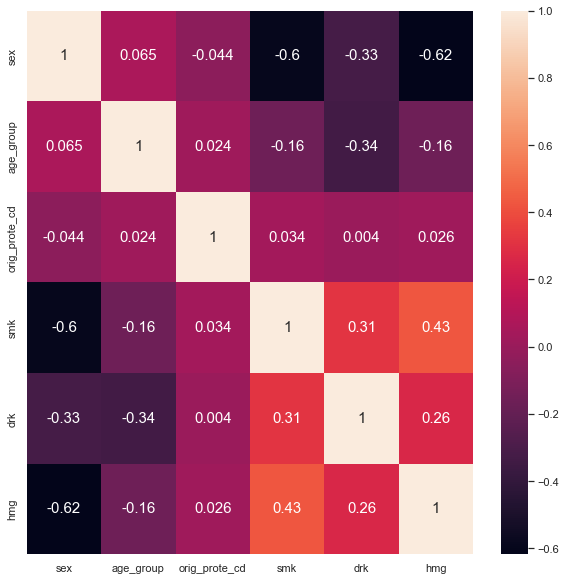

In [57]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (10,10))
sns.heatmap(he.corr(), annot = True,annot_kws={"size": 15})
plt.show()

In [58]:
he.corr()

,sex,age_group,orig_prote_cd,smk,drk,hmg
sex,1.000000,0.065388,-0.043821,-0.596244,-0.325499,-0.618036
age_group,0.065388,1.000000,0.024181,-0.162729,-0.335340,-0.158264
orig_prote_cd,-0.043821,0.024181,1.000000,0.034161,0.004004,0.025892
smk,-0.596244,-0.162729,0.034161,1.000000,0.313517,0.430544
drk,-0.325499,-0.335340,0.004004,0.313517,1.000000,0.259366
hmg,-0.618036,-0.158264,0.025892,0.430544,0.259366,1.000000


- sex 변수는 hmg, smk, drk 변수들과 강한 음의 상관관계를 가집니다.
- age_group 변수는 sex 변수와 약한 양의 상관관계를 나머지 변수와는 음의 상관관계를 가집니다.
- orig_prote_c 변수는  sex,age_group 변수들 음의 상관관계를 hmg,smk.drk는 약한 양의 상관관계를 가집니다.

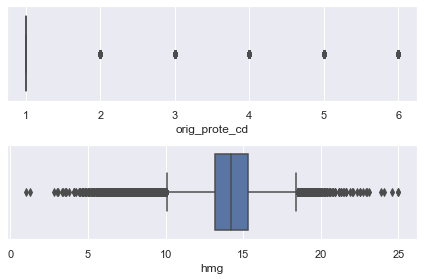

In [59]:
plt.subplot(2, 1, 1)  
sns.boxplot(x='orig_prote_cd', data=he)

plt.subplot(2, 1, 2) 
sns.boxplot(x='hmg', data=he)

plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='hmg'>

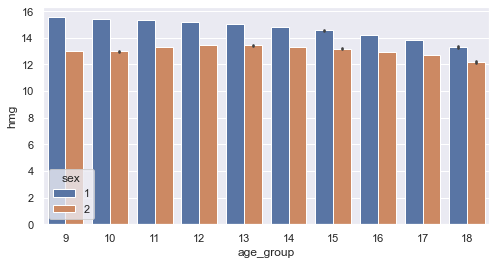

In [60]:
plt.figure(figsize=(8,4))
sns.barplot(data=he, x="age_group", y="hmg", hue="sex")


- 연령이 높을수록 성별이 남성인 사람이 헤모글로빈수치가 더 낮다.

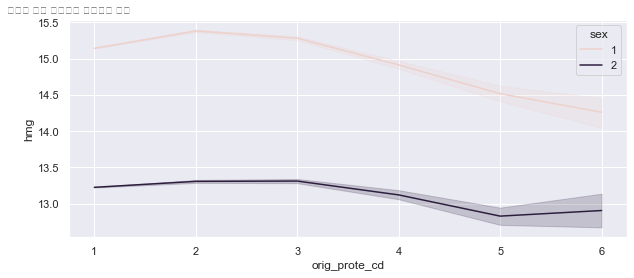

In [61]:
plt.figure(figsize = (10,4))
sns.lineplot(data=he, x="orig_prote_cd", y="hmg", hue="sex")
plt.rc('font', family='Malgun Gothic')
plt.title('성별에 따른 혈색소를 단백뇨로 구분', fontsize=10, fontweight='bold', position=(0, 0))
plt.show()


- 단백뇨가 1일때 헤모글로빈 수치가높고, 단백뇨가5,6 일때 헤모글로빈 수치가 낮아진다.
- 남자가 여자보다 헤모글로빈 수치가 높다
- 단백뇨 수치가 3이상이면 문제가 있는건데,,(잘모르겠음)

## 07. 다변량 분석 Multivariate Analysis

In [62]:
he.isnull().sum()

sex                  0
age_group            0
orig_prote_cd    12141
smk                343
drk                196
hmg               7611
dtype: int64

In [63]:
he=he.dropna()

In [64]:
import statsmodels.api as sm
#다중회귀분석
X = he[['sex', 'age_group','smk','drk', 'orig_prote_cd']]
y = he['hmg']

X = sm.add_constant(X)

# 다중회귀분석 모형 적합
model = sm.OLS(y, X)
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    hmg   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.322e+05
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:55:44   Log-Likelihood:            -1.5817e+06
No. Observations:              987335   AIC:                         3.163e+06
Df Residuals:                  987329   BIC:                         3.163e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4514      0.011   1538.811

- 회귀모형은 타당한가?
귀무가설 : 회귀모형은 타당하지 않다.
대립가설 : 회귀모형은 타당하다.
- 결과
Prob (F-statistic) : P-value = 0.00
유의확률이 0.000이므로 유의수준 0.05에서 회귀모형은 통계적으로 유의하게 타당한 것으로 나타났다.

##### 회귀식
hmg = -1.7487* 'sex' -0.0755 * 'age_group' + 0.1421 * 'smk'+ 0.0590 * 'drk'+ 0.0037*'orig_prote_cd' + 17.4514
  
- 연령대가 높아질수록,성별에 따라 혈색소 수치가 낮아질 가능성 있음 
- 단백뇨 수치가 높을수록,음주,흡연여부에 따라 혈색소 수치가 높아질 가능성 있음
- R-squared 값이 0.401

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

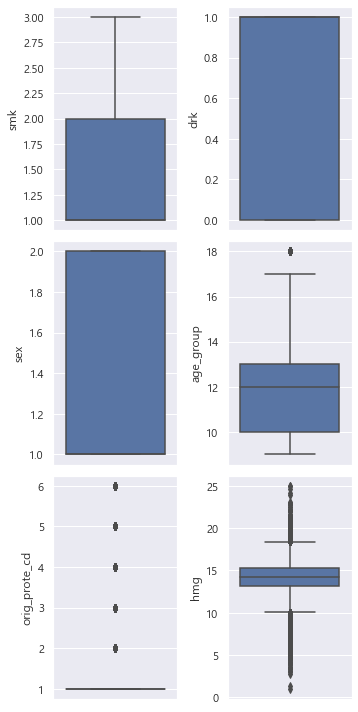

In [65]:
fig, axes = plt.subplots(3,2, figsize = (5,10))

sns.boxplot(y = he['smk'], ax = axes[0][0])
sns.boxplot(y = he['drk'], ax = axes[0][1])

sns.boxplot(y = he['sex'], ax = axes[1][0])
sns.boxplot(y = he['age_group'], ax = axes[1][1])

sns.boxplot(y = he['orig_prote_cd'], ax = axes[2][0])
sns.boxplot(y = he['hmg'], ax = axes[2][1])


plt.tight_layout()
plt.show()


### 09. 데이터 변환 Data Transformation

In [66]:
def outlier_iqr(data, col):
    #lower(하한),upper(상한) 글로벌 변수 선언하기
    global lower,upper
    #4분위수 기준 지정하기
    q1, q3 =np.quantile(data[col],0.25),np.quantile(data[col],0.75)
    #IQR 계산하기
    iqr = q3 - q1
    #lower,upper 구분값 구하기
    lower,upper= q1 - (1.5 * iqr),q3 + (1.5 * iqr)
    print('IQR은' , round(iqr,3),'이다.')
    print('lower 기준값은' , round(lower,3),'이다.')
    print('upper 기준값은' , round(upper,3),'이다.')
    
    #1사분위수와 4사분위에 속해 있는 데이터 각각 저장하기 
    data1 = data[data[col] > upper]
    data2 = data[data[col] < lower]
    #이상값 총 개수 구하기
    return print('총 이상값 개수는',data1.shape[0]+data2.shape[0],'이다.')

#주의할점 : 이상값 함수를 적용시키기 위해서는 결측값에 적합한 처리 한 후 함수를 적용해야한다

In [67]:
print("혈색소수치 이상값")
print(outlier_iqr(he,'hmg'))

혈색소수치 이상값
IQR은 2.1 이다.
lower 기준값은 10.05 이다.
upper 기준값은 18.45 이다.
총 이상값 개수는 11727 이다.
None


In [68]:
he["hmg"] = np.where((he["hmg"] < lower) | (he["hmg"] > upper), he["hmg"].median(), he["hmg"])
he.describe()

,sex,age_group,orig_prote_cd,smk,drk,hmg
count,987335.000000,987335.000000,987335.000000,987335.000000,987335.000000,987335.000000
mean,1.487745,11.887431,1.122272,1.559448,0.588234,14.258806
std,0.499850,2.150215,0.493361,0.784425,0.492153,1.440578
min,1.000000,9.000000,1.000000,1.000000,0.000000,10.100000
25%,1.000000,10.000000,1.000000,1.000000,0.000000,13.200000
50%,1.000000,12.000000,1.000000,1.000000,1.000000,14.200000
75%,2.000000,13.000000,1.000000,2.000000,1.000000,15.300000
max,2.000000,18.000000,6.000000,3.000000,1.000000,18.400000


In [69]:
#다중선형회귀분석

X = he[['sex', 'age_group','smk','drk', 'orig_prote_cd']]
y = he['hmg']

X = sm.add_constant(X)

# 다중회귀분석 모형 적합
model = sm.OLS(y, X)
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    hmg   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:55:47   Log-Likelihood:            -1.4880e+06
No. Observations:              987335   AIC:                         2.976e+06
Df Residuals:                  987329   BIC:                         2.976e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4663      0.010   1693.466

##### 회귀식
hmg = -1.6519* 'sex' -0.0794 * 'age_group' + 0.1308 * 'smk'+ 0.0545 * 'drk'+ 0.0117*'orig_prote_cd' + 17.4141
  
- 연령대가 높아질수록,성별에 따라 혈색소 수치가 낮아질 가능성 있음 
- 단백뇨 수치가 높을수록,음주,흡연여부에 따라 혈색소 수치가 높아질 가능성 있음
- R-squared 값이 0.425

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values ("VIF Factor"). reset_index(drop=True)
vif

,VIF Factor,features
0,1.002885,orig_prote_cd
1,1.139809,age_group
2,1.269862,drk
3,1.613361,smk
4,1.625790,sex
5,88.056165,const


- VIF 값(분산팽창지수) 이 10이상(엄격히는 5이상)인 경우, 다중공선성 있다고 판단

- 다중공선성을 가지는 독립변수를 하나씩 제거 -> 상관분석에서 상관계수가 0.9 이상인 두 개의 변수를 찾아 먼저 제거해보는 것이 좋습니다. 독립변수를 하나씩 제거하는 과정에서 설명력이 어떻게 변화는지를 체크한 후, 설명력이 유지되거나, 높아지는 변수를 제거합니다.

- PCA를 통해 주성분으로 차원을 감소시켜 다중공선성 문제를 해결 

In [71]:
import statsmodels.api as sm

# 종속변수와 설명변수 분리
X = he[['sex', 'age_group','smk','drk', 'orig_prote_cd']]
y = he['hmg']

# 모든 설명변수를 포함한 모델 적합
model = sm.OLS(y, sm.add_constant(X)).fit()

# 후진제거법 시작
while len(X.columns) > 0:
    # 현재 모델의 AIC 계산
    curr_aic = model.aic
    
    # 모든 변수를 한 번씩 제외한 후 AIC를 계산하고 최소 AIC를 가지는 변수 선택
    aic_list = []
    for col in X.columns:
        temp_cols = X.columns.drop(col)
        temp_model = sm.OLS(y, sm.add_constant(X[temp_cols])).fit()
        aic_list.append((col, temp_model.aic))
    aic_list.sort(key=lambda x: x[1])
    best_col, best_aic = aic_list[0]
    
    # 현재 모델의 AIC와 비교하여 AIC가 더 낮아지면 해당 변수 제거
    if best_aic < curr_aic:
        X = X.drop(best_col, axis=1)
        model = sm.OLS(y, sm.add_constant(X)).fit()
    else:
        break

# 최종 모델 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    hmg   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:55:55   Log-Likelihood:            -1.4880e+06
No. Observations:              987335   AIC:                         2.976e+06
Df Residuals:                  987329   BIC:                         2.976e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4663      0.010   1693.466

- 후진제거법으로 제외된 변수는 없으며, 이상치 처리 후 결정계수가 더 높아졌음을 확인

### 10. 결론 Conclusion
- EDA 과정에서 발견한 결과와 인사이트를 요약합니다.

## 목적 1

- 총콜레스테롤 수치,LDL콜레스테롤 수치,체질량지수가 높을수록 고지혈증 발생 확률이 높아진다는 것을 의미
- 여성보다 남성일 경우,연령이 증가할수록,HDL콜레스테롤 수치가 높을수록 고지혈증 발생 확률이 낮아진다는 것을 의미
- 이상치 처리 및 표준정규분포를 만들기 위한 스케일링 후 모델링 진행하기

##### 결론
총콜레스테롤수치,LDL콜레스테롤,체질량 지수가 높은 사람에게 정상수치로 돌아오기 위한 건강관리 방법을 알려주겠습니다.

## 목적 2 
- 연령대가 높아질수록,성별에 따라 혈색소 수치가 낮아질 가능성 있음 
- 단백뇨 수치가 높을수록,음주,흡연여부에 따라 혈색소 수치가 높아질 가능성 있음
- R-squared 값이 0.421(이상치 데이터 처리 후 설명력이 더 좋아졌다.)

##### 결론
연령대에 맞게 혈색소 수치를 높이는 영양제를 추전해주겠습니다.